<a href="https://colab.research.google.com/github/fmezacr/Circuitos-CC-CA/blob/main/Fasores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


---

<div style="font-size:small;">

MIT License

Copyright (c) [2024] Felipe Meza-Obando

*Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software for educational purposes only. You must give author appropriate credit, provide a link to the license and source, and indicate if changes were made.*
</div>

---

# **Tutorial: Introducción al concepto de Fasor en circuitos de CA**

### Autor: ***Felipe Meza-Obando***

In [16]:
# Configuraciones preliminares para graficar dentro del notebook:

import sympy
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 4)
plt.rcParams['font.size'] = 12


Abordaremos:

1. El concepto de fasor en el contexto de señales senoidales de corriente alterna (CA).  
2. La representación matemática (utilizando números complejos y la fórmula de Euler).  
3. Gráficas ilustrativas con Python.  
4. Ejemplo de conversión de una fuente de CA en el dominio del tiempo a su representación fasorial.


### 1.1. Señales sinusoidales y su representación compleja

Una señal senoidal de voltaje en el dominio del tiempo puede representarse de la forma:

$
v(t) = V_m \cos(\omega t + \theta)
$

donde:  
- $ V_m $ es la **amplitud de pico** (o valor máximo),  
- $\omega$ es la **frecuencia angular** en radianes/segundo ($\omega = 2\pi f$),  
- $\theta$ es la **fase inicial** de la señal.

Gracias a la **fórmula de Euler**, sabemos que:

$
e^{j\alpha} = \cos(\alpha) + j \,\sin(\alpha),
$

por lo que una onda senoidal se puede expresar de forma **compleja** (como parte real de una exponencial):

$
v(t) = \Re\{\,V_m e^{j(\omega t + \theta)}\}.
$


### 1.2. Definición de Fasor

El **fasor** de la señal $ v(t) $ se define como la representación compleja (en magnitud y fase) de una señal sinusoidal de frecuencia $\omega$. Convencionalmente, se toma la magnitud en **valor eficaz (RMS)** en lugar de la amplitud de pico cuando se trabaja en análisis de fasores, aunque en muchos textos de ingeniería, para simplificar, se usa directamente la amplitud pico en la notación fasorial.  

- **Valor eficaz (RMS)** de un seno $ V_m \cos(\omega t + \theta) $ es $ V = \frac{V_m}{\sqrt{2}} $.  
- La **fase** es $\theta$.

Por lo tanto, si queremos el fasor en términos de RMS, lo denotaremos como:

$
\tilde{V} = V \angle \theta = \frac{V_m}{\sqrt{2}} e^{j \theta}.
$

Si, por el contrario, el curso o texto en cuestión prefiere usar la amplitud pico en la notación fasorial, el fasor sería:

$
\tilde{V} = V_m \angle \theta.
$

**Convención más frecuente en el análisis de circuitos:** se usa el valor eficaz. Pero es muy importante aclarar qué convención se está usando.

---

### 2.1. Definimos la señal en Python

Supongamos que tenemos la señal:

$
v(t) = 170 \cos(100\pi t + 30^\circ)
$

donde:
- $ V_m = 170 \,\mathrm{V} $ (que equivaldría, por ejemplo, a 120 V RMS aprox. si consideramos que 120 V RMS ~ 170 V pico).
- $\omega = 100\pi $ rad/s (esto corresponde a una frecuencia de $ f = 50 \,\mathrm{Hz} $).
- $\theta = 30^\circ = \pi/6 $ rad.

En RMS, el fasor sería:

$
\tilde{V} = \frac{170}{\sqrt{2}} \angle \left(\frac{\pi}{6}\right) \approx 120 \angle 30^\circ.
$

Veamos cómo generar la señal en Python y graficarla.

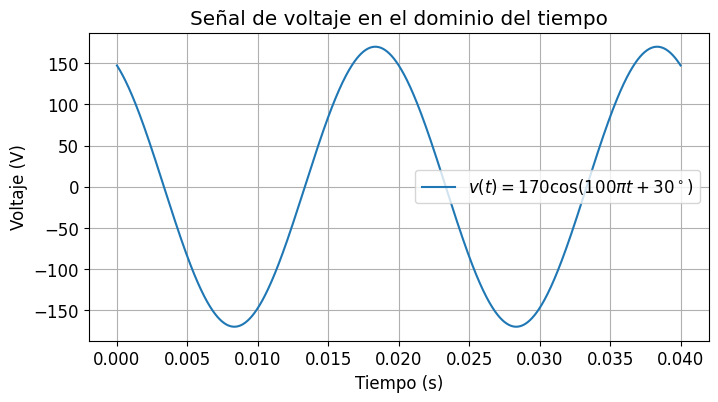

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
V_m = 170.0           # Amplitud de pico (V)
f   = 50.0            # Frecuencia (Hz)
omega = 2.0 * np.pi * f
theta_deg = 30.0      # Fase en grados
theta = np.deg2rad(theta_deg)

# Vector de tiempo
t_max = 0.04  # 40 ms ~ un poco menos de un ciclo (periodo = 1/f = 0.02 s a 50 Hz)
num_points = 1000
t = np.linspace(0, t_max, num_points)

# Señal en el tiempo
v_t = V_m * np.cos(omega * t + theta)

# Graficamos
plt.figure()
plt.plot(t, v_t, label=r'$v(t) = 170\cos(100\pi t + 30^\circ)$')
plt.title("Señal de voltaje en el dominio del tiempo")
plt.xlabel("Tiempo (s)")
plt.ylabel("Voltaje (V)")
plt.grid(True)
plt.legend()
plt.show()

### 2.2. Representación fasorial

La señal $v(t)$ puede representarse con el fasor (tomando valor eficaz):

$
\tilde{V} = \frac{170}{\sqrt{2}} \angle \frac{\pi}{6} \approx 120 \angle 30^\circ.
$

Este fasor es un número complejo. En Python podríamos expresarlo como:

$
\tilde{V} = 120 e^{j\,\frac{\pi}{6}}
$

y su forma rectangular sería:

$
120 (\cos(\frac{\pi}{6}) + j \sin(\frac{\pi}{6})).
$

Veámoslo en Python y grafiquemos en el **plano complejo**.

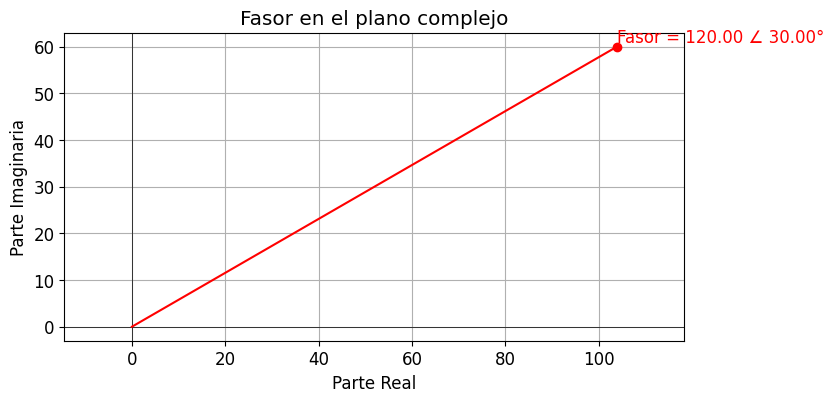

In [18]:
import math
import matplotlib.pyplot as plt

def dibujar_fasor_linea(V_rms, fase_deg):
    """
    Dibuja un fasor en el plano complejo con una línea (sin flecha)
    que va desde el origen hasta (x, y), y un punto final en color rojo.
    La escala se ajusta automáticamente.
    """

    # Convertimos la fase a radianes
    theta = math.radians(fase_deg)

    # Coordenadas del fasor
    x_end = V_rms * math.cos(theta)
    y_end = V_rms * math.sin(theta)

    # Crear la figura
    plt.figure()

    # Ejes X=0 e Y=0
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)

    # Dibuja la línea roja desde (0,0) hasta (x_end, y_end)
    plt.plot([0, x_end], [0, y_end], 'r-')  # línea roja continua

    # Dibuja un punto (marcador) en la punta del fasor
    plt.plot(x_end, y_end, 'ro')           # marcador circular rojo

    # Texto con datos del fasor (sin LaTeX)
    texto = f"Fasor = {V_rms:.2f} ∠ {fase_deg:.2f}°"
    plt.text(x_end, y_end, texto, color='red', ha='left', va='bottom')

    # Configuraciones de ejes
    plt.title("Fasor en el plano complejo")
    plt.xlabel("Parte Real")
    plt.ylabel("Parte Imaginaria")
    plt.grid(True)
    plt.axis('equal')      # Misma escala en X e Y
    plt.autoscale(True)    # Ajusta automáticamente los límites del gráfico

    # Mostrar y cerrar la figura para no dejarla en memoria
    plt.show()
    plt.close()

# Llamadas de ejemplo
dibujar_fasor_linea(120, 30)



### 3.1. Conversión de una fuente en el dominio del tiempo a fasor

Como ejemplo práctico, supongamos que tenemos una fuente de voltaje de CA:

$
v_s(t) = 50 \cos\left(314\,t - 45^\circ\right)\,\mathrm{V},
$

que corresponde aproximadamente a:
- $ V_m = 50 \,\mathrm{V} $.
- $\omega = 314\,\mathrm{rad/s}$ (lo que sugiere $f \approx 50\,\mathrm{Hz}$).
- $\theta = -45^\circ$.

**Paso para convertirla a fasor (con RMS)**:
1. El **valor eficaz** es $ V = \frac{50}{\sqrt{2}} \approx 35.36 \,\mathrm{V}$.
2. La fase es $\theta = -45^\circ$.

Por lo tanto:

$
\tilde{V}_s = 35.36 \angle (-45^\circ).
$


In [19]:
V_m2 = 50.0
theta_deg2 = -45.0
theta2 = np.deg2rad(theta_deg2)

V_rms2 = V_m2/np.sqrt(2)
V_fasor2 = V_rms2 * np.exp(1j*theta2)

print("Fuente en tiempo: v_s(t) = 50 cos(314t - 45°) V")
print("Fasor (RMS): {:.2f} ∠ {:.2f}°".format(abs(V_fasor2), np.angle(V_fasor2, deg=True)))

Fuente en tiempo: v_s(t) = 50 cos(314t - 45°) V
Fasor (RMS): 35.36 ∠ -45.00°


### 4. Conclusiones principales

1. **Fasor** es una forma compacta de representar cualquier señal sinusoidal de una frecuencia angular dada $\omega$.  
2. La magnitud del fasor corresponde usualmente al **valor eficaz** (RMS) de la onda, y la fase se mantiene igual a la de la señal en el dominio del tiempo.  
3. Esta representación es de gran utilidad para **simplificar la resolución** de circuitos lineales en régimen senoidal permanente, pues convierte ecuaciones diferenciales en **operaciones algebraicas complejas**.  
4. Para **reconvertir** un fasor al dominio del tiempo, se usa la parte real de la forma exponencial compleja y se multiplica por $\sqrt{2}$ si queremos obtener el valor pico.

---